In [204]:
import py_entropy
import numpy
from matplotlib import pyplot

In [205]:
def dag(x):
    return numpy.conj(x).T

L = 20
M = 2
states = py_entropy.MultiDefectState.gen_enumerated_states(L, M)

nis = numpy.array([
    (states == i).sum(axis=-1) for i in range(L)
])
nks = numpy.array([
    sum(numpy.exp(1.0j * i * 2 * numpy.pi * m / L) * nis[i] for i in range(L)) for m in range(L)
])

def make_t(i,j=None):
    d1s = numpy.array([1,1])
    d2s = numpy.array([1,2,1])
    
    if j is None:
        j = i+1
    t = numpy.zeros((states.shape[0], states.shape[0]))
    for a, state_a in enumerate(states):
        na1 = int(i in state_a)
        na2 = int(j in state_a)
        nga = na1 + na2
        remaining_a = sorted(x for x in state_a if x not in [i,j])
        for b, state_b in enumerate(states[a:]):
            b = b + a
            nb1 = int(i in state_b)
            nb2 = int(j in state_b)
            remaining_b = sorted(x for x in state_b if x not in [i,j])
            # prod_d1s = numpy.prod([d1s[x] for x in [na1,na2,nb1,nb2]])
            prod_d1s = 1.0
            ngb = nb1 + nb2
            delta = (nga == ngb) * (remaining_a == remaining_b)
            t[a,b] = delta * prod_d1s / d2s[nga]
            t[b,a] = t[a,b]
    return t

def make_h():
    eye = numpy.eye(states.shape[0])
    h = (eye - make_t(0))
    for i in range(1,L-1):
        h = h + (eye - make_t(i))
    return h

In [206]:
t = make_t(0)
numpy.linalg.eigvalsh(t)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

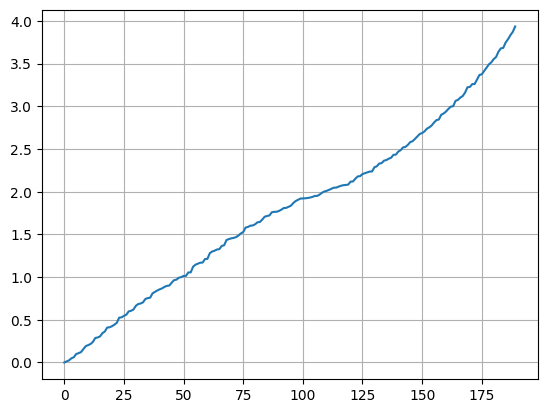

In [207]:
h = make_h()
pyplot.plot(numpy.linalg.eigvalsh(h))
pyplot.grid()

In [208]:
phi = numpy.ones(states.shape[0]) / numpy.sqrt(states.shape[0])
dag(phi) @ phi

1.0000000000000002

In [209]:
dag(phi) @ h @ phi

7.903384285029003e-17

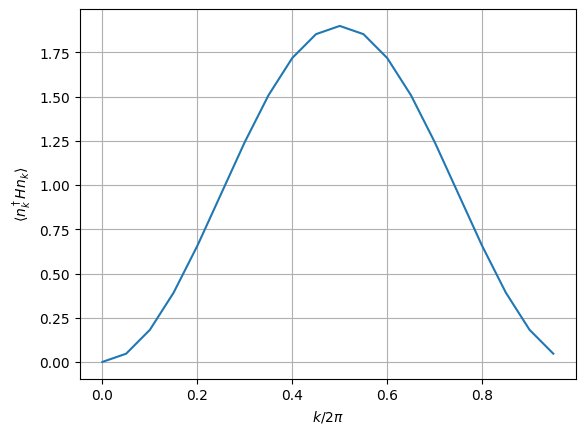

In [210]:
def phi_k(m):
    phi_k = nks[m] * phi
    norm = dag(phi_k) @ phi_k
    return phi_k / numpy.sqrt(norm)

es = []
for m in range(L):
    pk = phi_k(m)
    es.append(dag(pk) @ h @ pk)
es = numpy.array(es)

pyplot.plot(numpy.arange(L)/L, es.real)
pyplot.grid()
pyplot.xlabel(r'$k/2\pi$')
pyplot.ylabel(r'$\langle n^\dagger_k H n_k \rangle$')
pyplot.show()

In [188]:
def k_spectrum(L=10,M=1):
    states = py_entropy.MultiDefectState.gen_enumerated_states(L, M)

    nis = numpy.array([
        (states == i).sum(axis=-1) for i in range(L)
    ])
    nks = numpy.array([
        sum(numpy.exp(1.0j * i * 2 * numpy.pi * m / L) * nis[i] for i in range(L)) for m in range(L)
    ])

    def make_t(i,j=None):
        d1s = numpy.array([1,1])
        d2s = numpy.array([1,2,1])

        if j is None:
            j = i+1
        t = numpy.zeros((states.shape[0], states.shape[0]))
        for a, state_a in enumerate(states):
            na1 = int(i in state_a)
            na2 = int(j in state_a)
            nga = na1 + na2
            remaining_a = sorted(x for x in state_a if x not in [i,j])
            for b, state_b in enumerate(states[a:]):
                b = b + a
                nb1 = int(i in state_b)
                nb2 = int(j in state_b)
                remaining_b = sorted(x for x in state_b if x not in [i,j])
                # prod_d1s = numpy.prod([d1s[x] for x in [na1,na2,nb1,nb2]])
                prod_d1s = 1.0
                ngb = nb1 + nb2
                delta = (nga == ngb) * (remaining_a == remaining_b)
                t[a,b] = delta * prod_d1s / d2s[nga]
                t[b,a] = t[a,b]
        return t

    def make_h():
        eye = numpy.eye(states.shape[0])
        h = (eye - make_t(0))
        for i in range(1,L-1):
            h = h + (eye - make_t(i))
        return h
    
    phi = numpy.ones(states.shape[0]) / numpy.sqrt(states.shape[0])
    def phi_k(m):
        phi_k = nks[m] * phi
        norm = dag(phi_k) @ phi_k
        return phi_k / numpy.sqrt(norm)

    h = make_h()
    es = []
    for m in range(L):
        pk = phi_k(m)
        es.append(dag(pk) @ h @ pk)
    es = numpy.array(es)
    return es

In [195]:
Ls = numpy.arange(2,14,2)
gap = []
for L in Ls:
    es = k_spectrum(L=L,M=L//2)
    gap.append(es[1])
gap = numpy.array(gap)

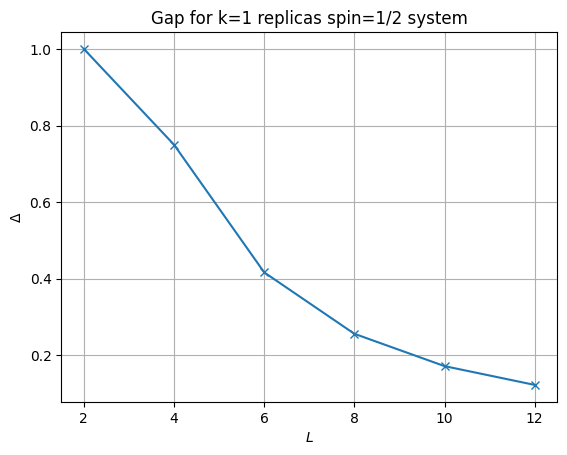

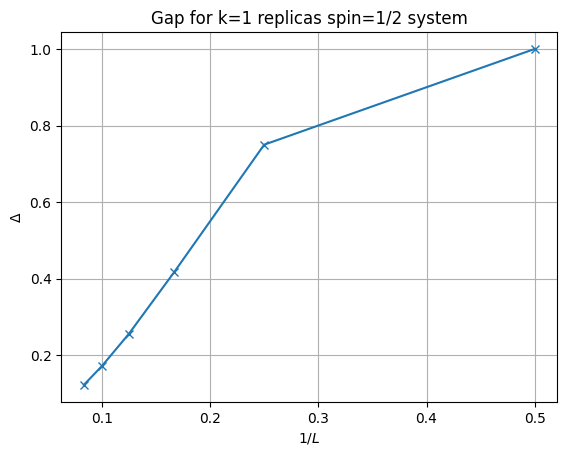

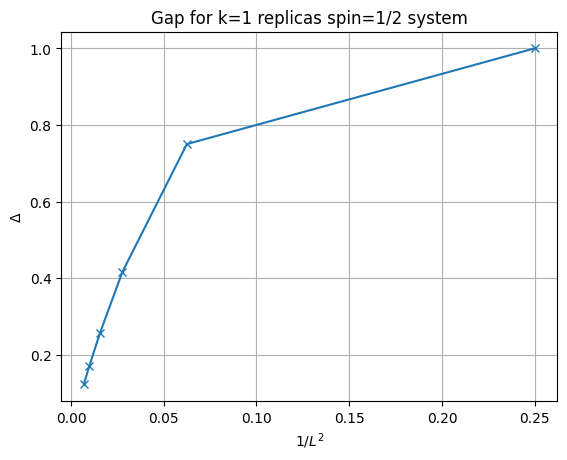

In [202]:
pyplot.plot(Ls,gap,'x-')
pyplot.grid()
pyplot.title('Gap for k=1 replicas spin=1/2 system')
pyplot.xlabel('$L$')
pyplot.ylabel(r'$\Delta$')
pyplot.show()

pyplot.plot(1.0/Ls,gap,'x-')
pyplot.title('Gap for k=1 replicas spin=1/2 system')
pyplot.xlabel('$1/L$')
pyplot.ylabel(r'$\Delta$')
pyplot.grid()
pyplot.show()

pyplot.plot(1.0/Ls**2,gap,'x-')
pyplot.title('Gap for k=1 replicas spin=1/2 system')
pyplot.xlabel('$1/L^2$')
pyplot.ylabel(r'$\Delta$')
pyplot.grid()
pyplot.show()

In [213]:
Ls = numpy.arange(4,20,4)
gap = []
for L in Ls:
    es = k_spectrum(L=L,M=L//4)
    gap.append(es[1])
gap = numpy.array(gap)

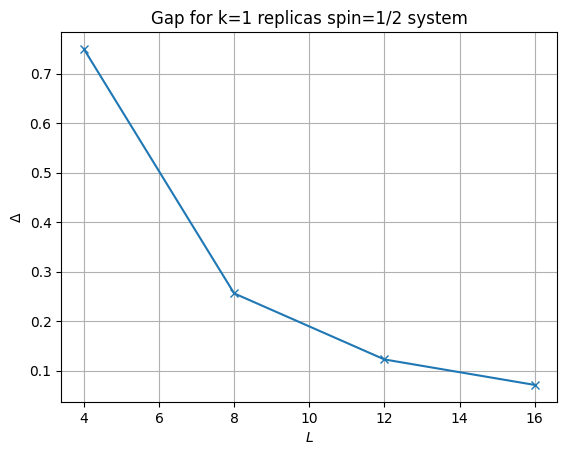

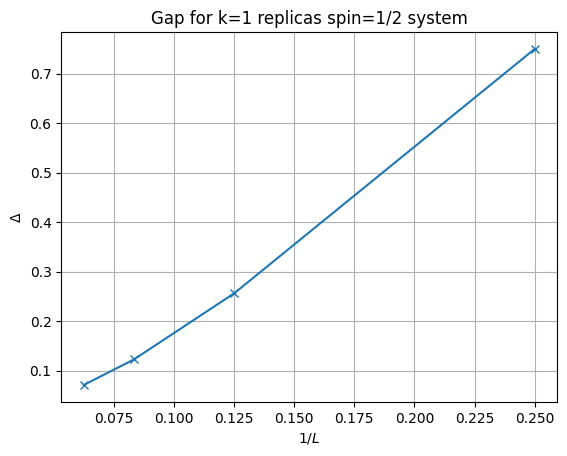

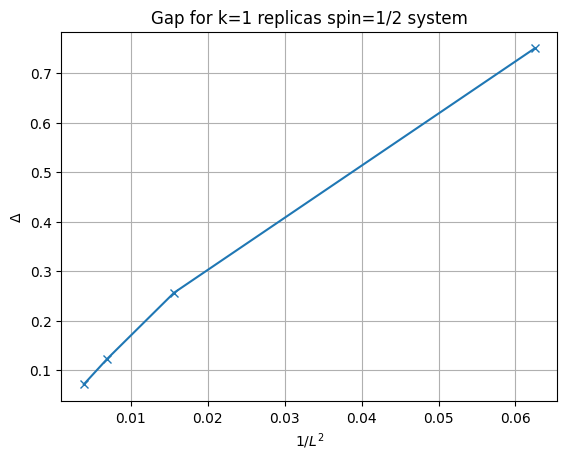

In [214]:
pyplot.plot(Ls,gap,'x-')
pyplot.grid()
pyplot.title('Gap for k=1 replicas spin=1/2 system')
pyplot.xlabel('$L$')
pyplot.ylabel(r'$\Delta$')
pyplot.show()

pyplot.plot(1.0/Ls,gap,'x-')
pyplot.title('Gap for k=1 replicas spin=1/2 system')
pyplot.xlabel('$1/L$')
pyplot.ylabel(r'$\Delta$')
pyplot.grid()
pyplot.show()

pyplot.plot(1.0/Ls**2,gap,'x-')
pyplot.title('Gap for k=1 replicas spin=1/2 system')
pyplot.xlabel('$1/L^2$')
pyplot.ylabel(r'$\Delta$')
pyplot.grid()
pyplot.show()

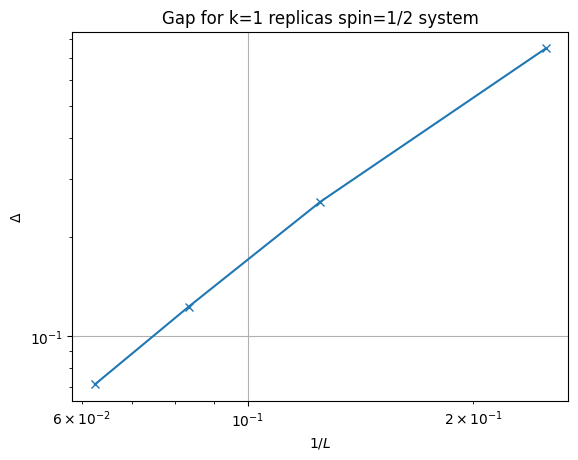

In [216]:
pyplot.plot(1.0/Ls,gap,'x-')
pyplot.title('Gap for k=1 replicas spin=1/2 system')
pyplot.xlabel('$1/L$')
pyplot.ylabel(r'$\Delta$')
pyplot.yscale('log')
pyplot.xscale('log')
pyplot.grid()
pyplot.show()